In [351]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
##for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [338]:
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt

In [339]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [340]:
train_dir = "/kaggle/input/pneumonia1/train"
train_generator = ImageDataGenerator(rescale=1/255)
data_train = train_generator.flow_from_directory(train_dir, target_size=(120,120), batch_size=8, class_mode="binary")

Found 5216 images belonging to 2 classes.


In [341]:
val_dir = "/kaggle/input/pneumonia1/val"
val_generator = ImageDataGenerator(rescale=1/255)
data_val = val_generator.flow_from_directory(val_dir, target_size=(120,120), batch_size=8, class_mode="binary")

Found 16 images belonging to 2 classes.


In [342]:
test_dir = "/kaggle/input/pneumonia1/test"
test_generator = ImageDataGenerator(rescale=1/255)
data_test = test_generator.flow_from_directory(test_dir, target_size=(120,120), batch_size=8, class_mode="binary")

Found 624 images belonging to 2 classes.


In [343]:
cnn_model = tf.keras.Sequential([tf.keras.layers.Conv2D(32, (3,3),input_shape=(120,120,3),activation="relu"),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 tf.keras.layers.Conv2D(256,(3,3),activation="relu"),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 tf.keras.layers.Conv2D(512,(3,3),activation="relu"),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(256,activation = "relu"),
                                 tf.keras.layers.Dense(1,activation = "sigmoid")])

In [344]:
cnn_model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_96 (Conv2D)          (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d_96 (MaxPooli  (None, 59, 59, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_97 (Conv2D)          (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_97 (MaxPooli  (None, 28, 28, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_98 (Conv2D)          (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_98 (MaxPooli  (None, 13, 13, 128)     

In [345]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss="binary_crossentropy", metrics=["acc"])

In [346]:
history = cnn_model.fit(data_train , epochs=2, validation_data = data_val)

Epoch 1/2
652/652 [==============================] - 113s 170ms/step - loss: 0.4086 - acc: 0.8230 - val_loss: 0.7617 - val_acc: 0.7500
Epoch 2/2
652/652 [==============================] - 110s 169ms/step - loss: 0.1621 - acc: 0.9392 - val_loss: 0.1799 - val_acc: 0.9375


In [347]:
cnn_model.evaluate(data_test)

78/78 [==============================] - 7s 96ms/step - loss: 0.5722 - acc: 0.7532


[0.5721948742866516, 0.7532051205635071]

In [348]:
prediction = cnn_model.predict(data_test)

78/78 [==============================] - 8s 96ms/step


In [349]:
prediction

array([[0.8721605 ],
       [0.9933693 ],
       [0.92455035],
       [0.4070656 ],
       [0.00944199],
       [0.85123223],
       [0.99929565],
       [0.9955938 ],
       [0.99961424],
       [0.69170606],
       [0.985241  ],
       [0.83064824],
       [0.994357  ],
       [0.9725683 ],
       [0.7647943 ],
       [0.96791965],
       [0.4483751 ],
       [0.42919686],
       [0.9980578 ],
       [0.9969286 ],
       [0.99188125],
       [0.9671233 ],
       [0.3794957 ],
       [0.9970396 ],
       [0.9330699 ],
       [0.9871809 ],
       [0.8638659 ],
       [0.99368536],
       [0.9976609 ],
       [0.92979556],
       [0.7878709 ],
       [0.99810255],
       [0.9985292 ],
       [0.99608094],
       [0.10524913],
       [0.9958278 ],
       [0.989774  ],
       [0.92306894],
       [0.4732638 ],
       [0.7348774 ],
       [0.9993821 ],
       [0.86132145],
       [0.963735  ],
       [0.9981871 ],
       [0.68179476],
       [0.9989528 ],
       [0.9328404 ],
       [0.987

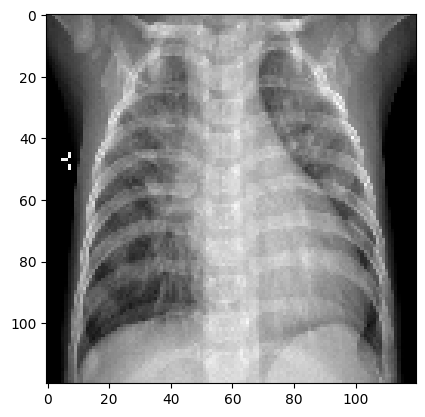

The probability of pneumonia is: [0.8721605]


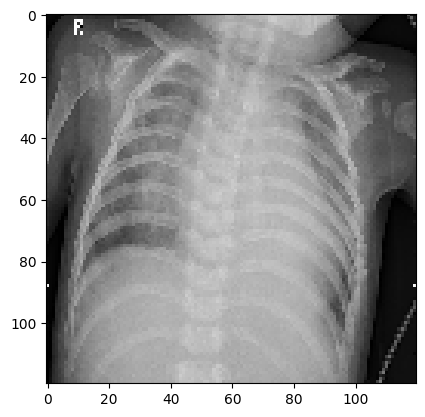

The probability of pneumonia is: [0.9933693]


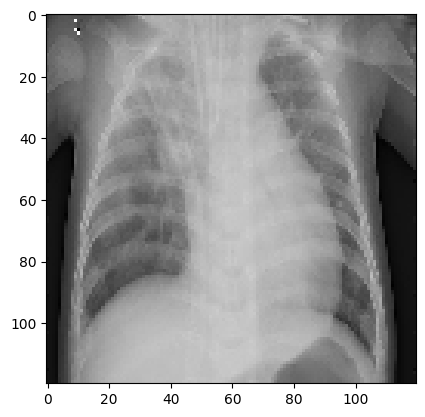

The probability of pneumonia is: [0.92455035]


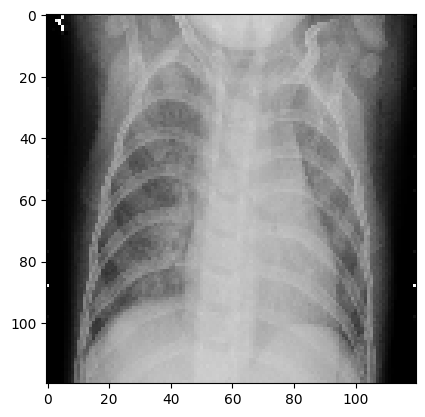

The probability of pneumonia is: [0.4070656]


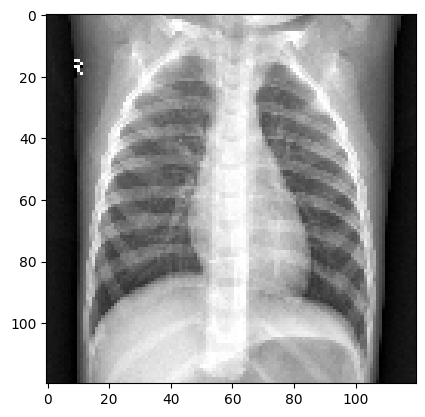

The probability of pneumonia is: [0.00944199]


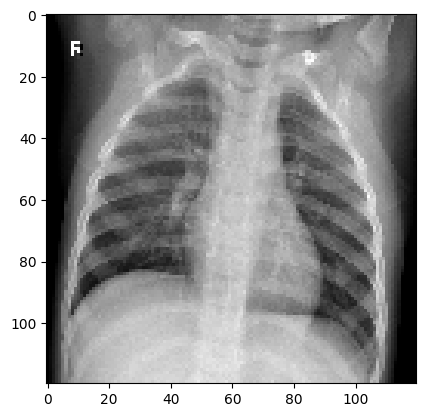

The probability of pneumonia is: [0.85123223]


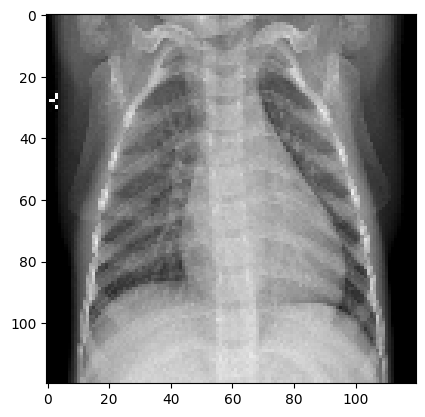

The probability of pneumonia is: [0.99929565]


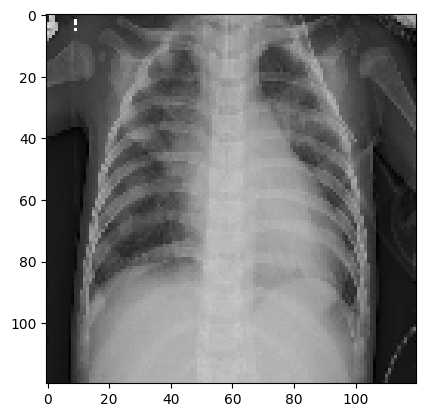

The probability of pneumonia is: [0.9955938]


In [350]:
x = data_test.next()
for i in range(0,1):
    image=x[i]
    for j in range(0,8):
        plt.imshow(image[j])
        plt.show()
        print("The probability of pneumonia is:",prediction[j])
        